In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Analysis

Looking at the training data and figuring out what everything means.

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [4]:
train.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [5]:
data_dict = pd.read_excel('data/Data Dictionary.xlsx')

In [6]:
data_dict

,Variable Name,Description,Unnamed: 2
0,UniqueID,Identifier for customers,NaN
1,loan_default,Payment default in the first EMI on due date,NaN
2,disbursed_amount,Amount of Loan disbursed,NaN
3,asset_cost,Cost of the Asset,NaN
4,ltv,Loan to Value of the asset,NaN
5,branch_id,Branch where the loan was disbursed,NaN
6,supplier_id,Vehicle Dealer where the loan was disbursed,NaN
7,manufacturer_id,"Vehicle manufacturer(Hero, Honda, TVS etc.)",NaN
8,Current_pincode,Current pincode of the customer,NaN
9,Date.of.Birth,Date of birth of the customer,NaN


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date.of.Birth                          233154 non-null object
Employment.Type                        225493 non-null object
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                   

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112392 entries, 0 to 112391
Data columns (total 40 columns):
UniqueID                               112392 non-null int64
disbursed_amount                       112392 non-null int64
asset_cost                             112392 non-null int64
ltv                                    112392 non-null float64
branch_id                              112392 non-null int64
supplier_id                            112392 non-null int64
manufacturer_id                        112392 non-null int64
Current_pincode_ID                     112392 non-null int64
Date.of.Birth                          112392 non-null object
Employment.Type                        108949 non-null object
DisbursalDate                          112392 non-null object
State_ID                               112392 non-null int64
Employee_code_ID                       112392 non-null int64
MobileNo_Avl_Flag                      112392 non-null int64
Aadhar_flag                   

We have about 233k entries for the training set and a further 112k for the testing set. The majority of the data are integers, however we have a single floating point data and some objects.
For some reason employment type isn't the same size as everything else in both datasets. 

#### Employment.Type

In [6]:
train['Employment.Type'].value_counts() + test['Employment.Type'].value_counts()

Self employed    187429
Salaried         147013
Name: Employment.Type, dtype: int64

In [7]:
train.isnull().sum() + test.isnull().sum()

AVERAGE.ACCT.AGE                           0.0
Aadhar_flag                                0.0
CREDIT.HISTORY.LENGTH                      0.0
Current_pincode_ID                         0.0
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS        0.0
Date.of.Birth                              0.0
DisbursalDate                              0.0
Driving_flag                               0.0
Employee_code_ID                           0.0
Employment.Type                        11104.0
MobileNo_Avl_Flag                          0.0
NEW.ACCTS.IN.LAST.SIX.MONTHS               0.0
NO.OF_INQUIRIES                            0.0
PAN_flag                                   0.0
PERFORM_CNS.SCORE                          0.0
PERFORM_CNS.SCORE.DESCRIPTION              0.0
PRI.ACTIVE.ACCTS                           0.0
PRI.CURRENT.BALANCE                        0.0
PRI.DISBURSED.AMOUNT                       0.0
PRI.NO.OF.ACCTS                            0.0
PRI.OVERDUE.ACCTS                          0.0
PRI.SANCTIONE

So this shows two types of employment - salaried & self-employed. So it's reasonable to assume that the remaining null values here are those who are unemployed. (Ignore the NaN for loan_default. That's because the test set doesn't have that column as that's what we need to predict.) So I'm going to add a new category for all the null values and simply call it 'Unemployed'.

In [8]:
train['Employment.Type'].fillna('Unemployed', inplace = True)
test['Employment.Type'].fillna('Unemployed', inplace = True)

Text(0.5, 1.0, 'Test Set')

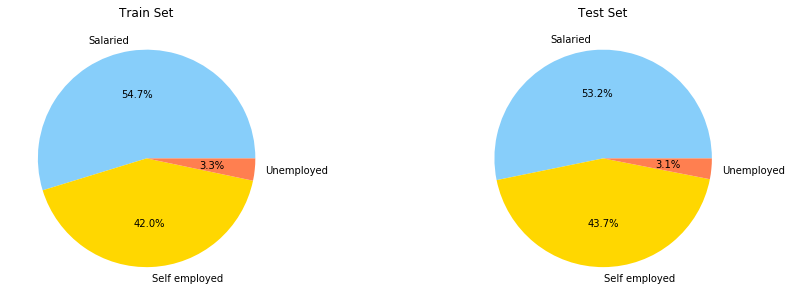

In [9]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
plt.pie(train['Employment.Type'].value_counts(), labels = train['Employment.Type'].unique(), 
        colors = ['lightskyblue', 'gold', 'coral'], autopct='%1.1f%%')
plt.title('Train Set')
plt.subplot(1, 2, 2)
plt.pie(test['Employment.Type'].value_counts(), labels = test['Employment.Type'].unique(), 
        colors = ['lightskyblue', 'gold', 'coral'], autopct='%1.1f%%')
plt.title('Test Set')

So the distribution in both the test and train sets are pretty similar with the vast majority of both being salaried workers. Since these are categorical variables, I'm going to encode them.

In [10]:
train['Employment.Type'].replace(['Self employed', 'Salaried', 'Unemployed'], [2, 1, 0], inplace = True)
test['Employment.Type'].replace(['Self employed', 'Salaried', 'Unemployed'], [2, 1, 0], inplace = True)

#### Date of Birth

Date of birth is kinda useless here. It shouldn't really affect anything in the grand scale of things. However, the year of birth might be useful.

In [11]:
train['Date.of.Birth'] = pd.to_datetime(train['Date.of.Birth'], errors = 'coerce')
train['Date.of.Birth'] = train['Date.of.Birth'].dt.year
test['Date.of.Birth'] = pd.to_datetime(test['Date.of.Birth'], errors = 'coerce')
test['Date.of.Birth'] = test['Date.of.Birth'].dt.year

Text(0.5, 1.0, 'Test Set')

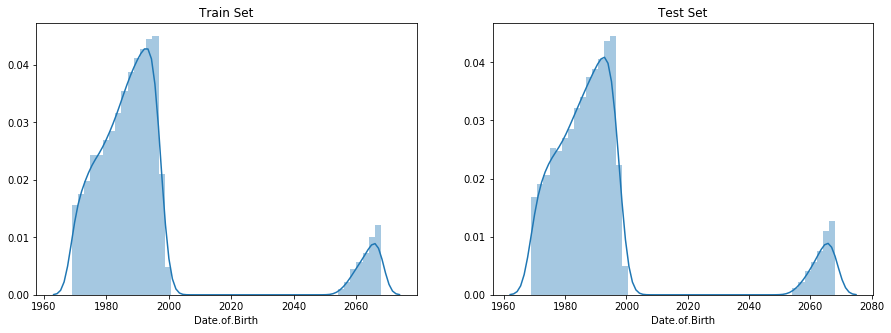

In [12]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.distplot(train['Date.of.Birth'])
plt.title('Train Set')
plt.subplot(1, 2, 2)
sns.distplot(test['Date.of.Birth'])
plt.title('Test Set')

So due to a tiny error in the data calculation stuff, it assumed that everything below ~1965 was in the 2060s which is sorta absurd. So correcting that here.

In [13]:
train['Date.of.Birth'] = train['Date.of.Birth'].apply(lambda x: x - 100 if x > 2000 else x)
test['Date.of.Birth'] = test['Date.of.Birth'].apply(lambda x: x - 100 if x > 2000 else x)

Text(0.5, 1.0, 'Test Set')

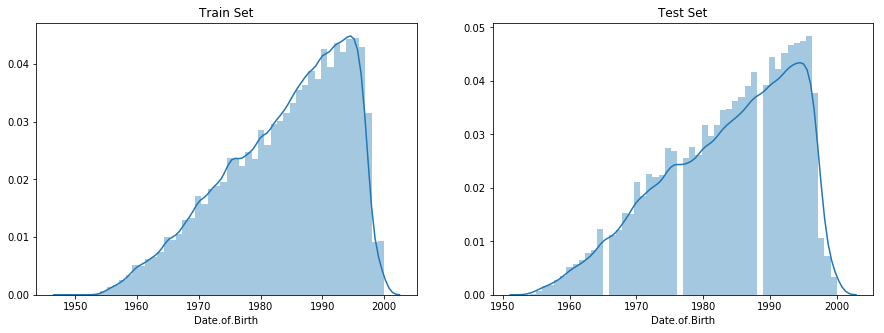

In [14]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.distplot(train['Date.of.Birth'])
plt.title('Train Set')
plt.subplot(1, 2, 2)
sns.distplot(test['Date.of.Birth'])
plt.title('Test Set')

All better now. Interestingly enough, the test set does seem to have a few 'gap' years with no loans.

#### Disbursal Date

Basically when the loan was given.

In [15]:
train['DisbursalDate'] = pd.to_datetime(train['DisbursalDate'], errors = 'coerce')
test['DisbursalDate'] = pd.to_datetime(test['DisbursalDate'], errors = 'coerce')

In [16]:
train['DisbursalDate'].dt.year.value_counts() + test['DisbursalDate'].dt.year.value_counts()

2018    345546
Name: DisbursalDate, dtype: int64

So evidently every loan in this dataset was from 2018. So it's no use keeping the year alone here. And the days kinda vary too much to be of any use. So the only usable feature here is the month. So gonna extract that.

In [17]:
train['DisbursalDate'] = train['DisbursalDate'].dt.month
test['DisbursalDate'] = test['DisbursalDate'].dt.month

Text(0.5, 1.0, 'Test Set')

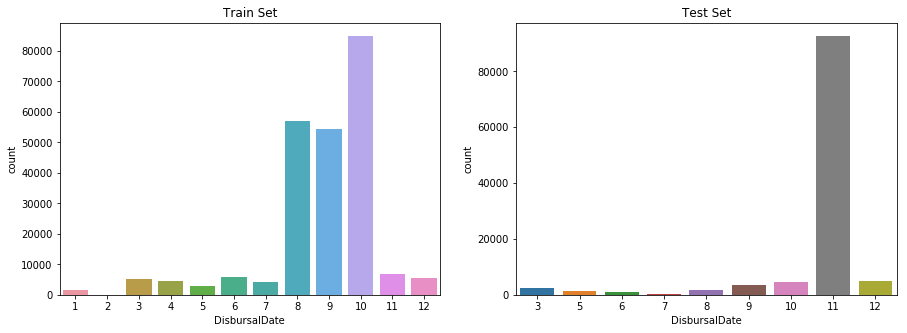

In [18]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.countplot(train['DisbursalDate'])
plt.title('Train Set')
plt.subplot(1, 2, 2)
sns.countplot(test['DisbursalDate'])
plt.title('Test Set')

Interesting. The majority of loans seem to have been given out between August and October. Not sure if this is a quirk of the dataset or if that's how it actually is. February in particular has almost 0 disbursements. Looking at the test set, there seems to be a stark difference here as well. Nearly all the loans in this set are from November. And some months don't even have loans disbursed.

#### PERFORM_CNS.SCORE & PERFORM_CNS.SCORE.DESCRIPTION 

The score assigned by the bureau and it's associated description.

In [19]:
train[['PERFORM_CNS.SCORE', 'PERFORM_CNS.SCORE.DESCRIPTION']].head(15)

,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION
0,0,No Bureau History Available
1,598,I-Medium Risk
2,0,No Bureau History Available
3,305,L-Very High Risk
4,0,No Bureau History Available
5,825,A-Very Low Risk
6,0,No Bureau History Available
7,17,Not Scored: Not Enough Info available on the c...
8,718,D-Very Low Risk
9,818,A-Very Low Risk


So the higher this score, the lower the risk. Now the two columns are just different ways of representing the same data. So it's better to use one. 

In [20]:
sorted(train['PERFORM_CNS.SCORE.DESCRIPTION'].unique())

['A-Very Low Risk',
 'B-Very Low Risk',
 'C-Very Low Risk',
 'D-Very Low Risk',
 'E-Low Risk',
 'F-Low Risk',
 'G-Low Risk',
 'H-Medium Risk',
 'I-Medium Risk',
 'J-High Risk',
 'K-High Risk',
 'L-Very High Risk',
 'M-Very High Risk',
 'No Bureau History Available',
 'Not Scored: More than 50 active Accounts found',
 'Not Scored: No Activity seen on the customer (Inactive)',
 'Not Scored: No Updates available in last 36 months',
 'Not Scored: Not Enough Info available on the customer',
 'Not Scored: Only a Guarantor',
 'Not Scored: Sufficient History Not Available']

Text(0.5, 1.0, 'Test Set')

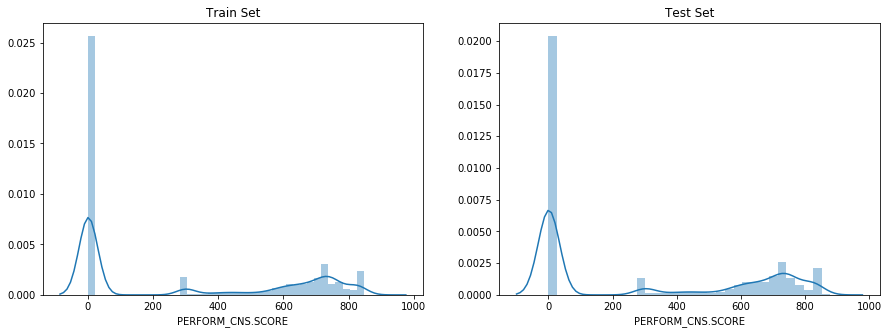

In [21]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.distplot(train['PERFORM_CNS.SCORE'])
plt.title('Train Set')
plt.subplot(1, 2, 2)
sns.distplot(test['PERFORM_CNS.SCORE'])
plt.title('Test Set')

Now that's a lot of categories. I think that we could simply set it to 6 categories: Not Scored, Very Low Risk, Low Risk, Medium Risk, High Risk, & Very High Risk. Let's assign these categories and encode it to 0-5. Plus from the two graphs above we can see that the PERFORM_CNS.SCORE is very sparse in some regions and very dense in others. So it's not really something we can use. So instead of these two columns, we can have a single column with the 6 categories.

In [22]:
train['PERFORM_CNS.SCORE.DESCRIPTION'].replace(
    ['No Bureau History Available', 'Not Scored: More than 50 active Accounts found', 
     'Not Scored: No Activity seen on the customer (Inactive)', 'Not Scored: No Updates available in last 36 months', 
     'Not Scored: Not Enough Info available on the customer', 'Not Scored: Only a Guarantor', 
     'Not Scored: Sufficient History Not Available'],
    [0, 0, 0, 0, 0, 0, 0],
    inplace = True
)
train['PERFORM_CNS.SCORE.DESCRIPTION'].replace(
    ['A-Very Low Risk', 'B-Very Low Risk', 'C-Very Low Risk', 'D-Very Low Risk', 'E-Low Risk', 'F-Low Risk', 
     'G-Low Risk', 'H-Medium Risk', 'I-Medium Risk', 'J-High Risk', 'K-High Risk','L-Very High Risk', 
     'M-Very High Risk'],
    [1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 5, 5],
    inplace = True
)
test['PERFORM_CNS.SCORE.DESCRIPTION'].replace(
    ['No Bureau History Available', 'Not Scored: More than 50 active Accounts found', 
     'Not Scored: No Activity seen on the customer (Inactive)', 'Not Scored: No Updates available in last 36 months', 
     'Not Scored: Not Enough Info available on the customer', 'Not Scored: Only a Guarantor', 
     'Not Scored: Sufficient History Not Available'],
    [0, 0, 0, 0, 0, 0, 0],
    inplace = True
)
test['PERFORM_CNS.SCORE.DESCRIPTION'].replace(
    ['A-Very Low Risk', 'B-Very Low Risk', 'C-Very Low Risk', 'D-Very Low Risk', 'E-Low Risk', 'F-Low Risk', 
     'G-Low Risk', 'H-Medium Risk', 'I-Medium Risk', 'J-High Risk', 'K-High Risk','L-Very High Risk', 
     'M-Very High Risk'],
    [1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 5, 5],
    inplace = True
)

In [23]:
train.drop(['PERFORM_CNS.SCORE'], axis = 1, inplace = True)
test.drop(['PERFORM_CNS.SCORE'], axis = 1, inplace = True)

Text(0.5, 1.0, 'Test Set')

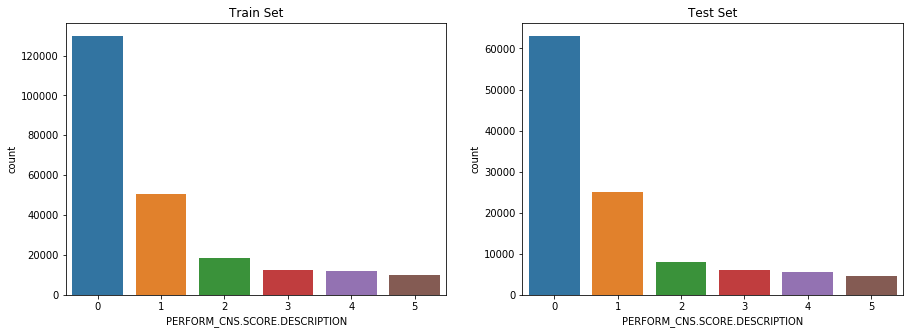

In [24]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.countplot(train['PERFORM_CNS.SCORE.DESCRIPTION'])
plt.title('Train Set')
plt.subplot(1, 2, 2)
sns.countplot(test['PERFORM_CNS.SCORE.DESCRIPTION'])
plt.title('Test Set')

The distribution of the data seems similar in both cases. Majority of them are unscored due to various reasons.

#### AVERAGE.ACCT.AGE

It's the average loan tenure. So 0 would imply that it's their first loan. 

In [25]:
def year_to_month(year_month):
    year = year_month.split(' ')[0].split('yrs')[0]
    month = year_month.split(' ')[1].split('mon')[0]
    return (int(year) * 12) + int(month) 

In [87]:
train['AVERAGE.ACCT.AGE'].head()

0     0yrs 0mon
1    1yrs 11mon
2     0yrs 0mon
3     0yrs 8mon
4     0yrs 0mon
Name: AVERAGE.ACCT.AGE, dtype: object

In [88]:
train['AVERAGE.ACCT.AGE'] = train['AVERAGE.ACCT.AGE'].apply(year_to_month)
test['AVERAGE.ACCT.AGE'] = test['AVERAGE.ACCT.AGE'].apply(year_to_month)

In [82]:
train['AVERAGE.ACCT.AGE'].head()

0     0
1    23
2     0
3     8
4     0
Name: AVERAGE.ACCT.AGE, dtype: int64

So now we've converted the year + month notation to just the months.

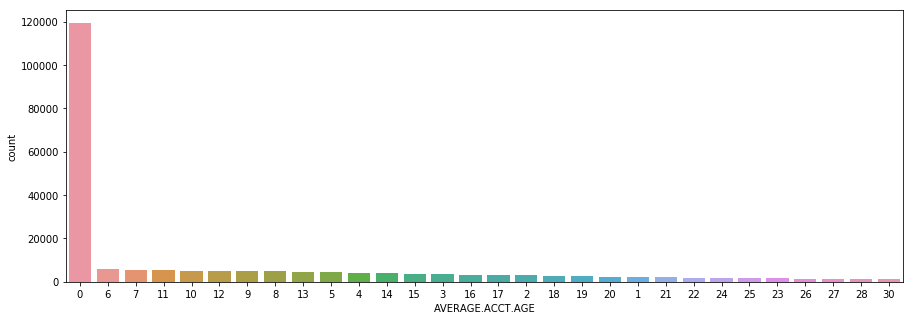

In [29]:
sns.countplot(train['AVERAGE.ACCT.AGE'], order=pd.value_counts(train['AVERAGE.ACCT.AGE']).iloc[:30].index)

The figure above shows only the top 30, in actuality there's 192 values, most of which are 1. I'm gonna bin these values into 4 categories:

1. 0 or first time loan
2. Less than a year
3. Between 1 and 5 years
4. More than 5 years

In [89]:
def bucket_average_acct_age(age):
    if age == 0:
        return 0
    elif age <= 12:
        return 1
    elif age <= 60: 
        return 2
    else:
        return 3

In [90]:
train['AVERAGE.ACCT.AGE'] = train['AVERAGE.ACCT.AGE'].apply(bucket_average_acct_age)
test['AVERAGE.ACCT.AGE'] = test['AVERAGE.ACCT.AGE'].apply(bucket_average_acct_age)

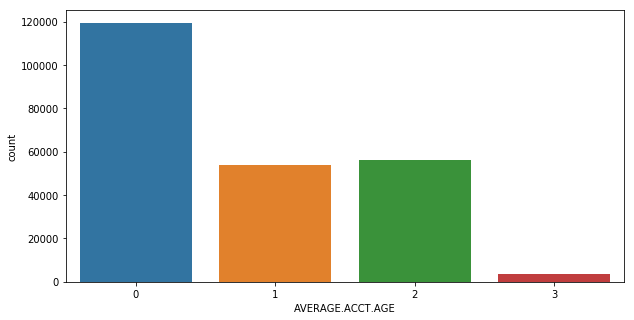

In [91]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(train['AVERAGE.ACCT.AGE'])

Much better. We see that there are very few accounts have taken loans for more than 5 years.

#### CREDIT.HISTORY.LENGTH

Time since the first loan.

In [30]:
train['CREDIT.HISTORY.LENGTH'].head()

0     0yrs 0mon
1    1yrs 11mon
2     0yrs 0mon
3     1yrs 3mon
4     0yrs 0mon
Name: CREDIT.HISTORY.LENGTH, dtype: object

So using the same function as above, I'm converting the year+month format to months alone.

In [31]:
train['CREDIT.HISTORY.LENGTH'] = train['CREDIT.HISTORY.LENGTH'].apply(year_to_month)
test['CREDIT.HISTORY.LENGTH'] = test['CREDIT.HISTORY.LENGTH'].apply(year_to_month)

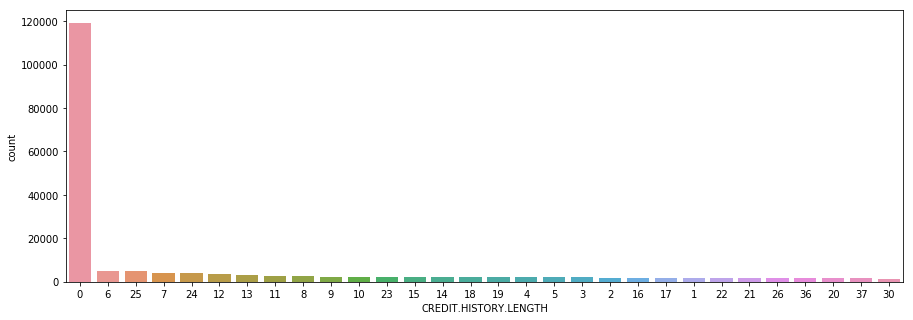

In [32]:
sns.countplot(train['CREDIT.HISTORY.LENGTH'], order=pd.value_counts(train['CREDIT.HISTORY.LENGTH']).iloc[:30].index)

And same as before, there's a lot more entries here. And same as before, I'm gonna bin these values into 4 categories:

1. 0 or first time loan
2. Less than a year
3. Between 1 and 5 years
4. More than 5 years

In [92]:
train['CREDIT.HISTORY.LENGTH'] = train['CREDIT.HISTORY.LENGTH'].apply(bucket_average_acct_age)
test['CREDIT.HISTORY.LENGTH'] = test['CREDIT.HISTORY.LENGTH'].apply(bucket_average_acct_age)

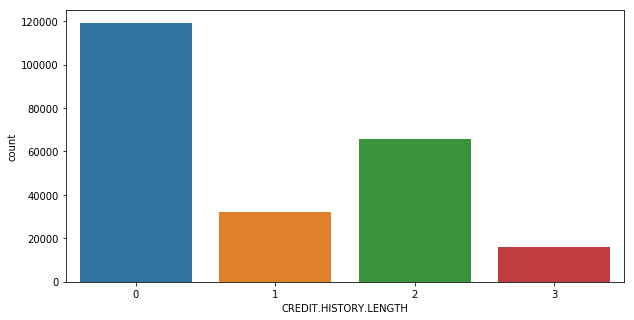

In [93]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(train['CREDIT.HISTORY.LENGTH'])

#### LTV

LTV is defined as "Loan to Value of the asset". So a quick Wikipedia read-through basically says that it's the ratio of a loan to the value of whatever is purchased. The higher the ratio, the greater the risk.

In [33]:
train['ltv'].head()

0    89.55
1    73.23
2    89.63
3    88.48
4    88.39
Name: ltv, dtype: float64

Text(0.5, 1.0, 'Test Data')

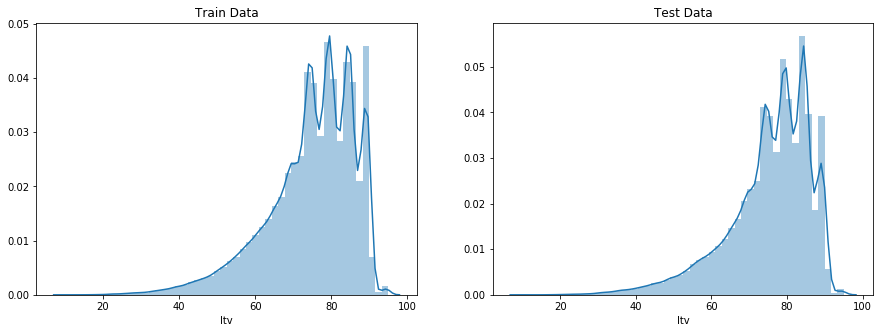

In [34]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.distplot(train['ltv'])
plt.title('Train Data')
plt.subplot(1, 2, 2)
sns.distplot(test['ltv'])
plt.title('Test Data')

Similar distribution of data here. Even though there's more risk associated with high ltv, there seems to be more datapoints having high ltv. So here, the data has a pretty wide range of values. But we do know that all the values here will be between 0 and 100. So let's scale it down to 0-1.

In [104]:
train['ltv'] = train['ltv'] / 100
test['ltv'] = test['ltv'] / 100

Text(0.5, 1.0, 'Test Data')

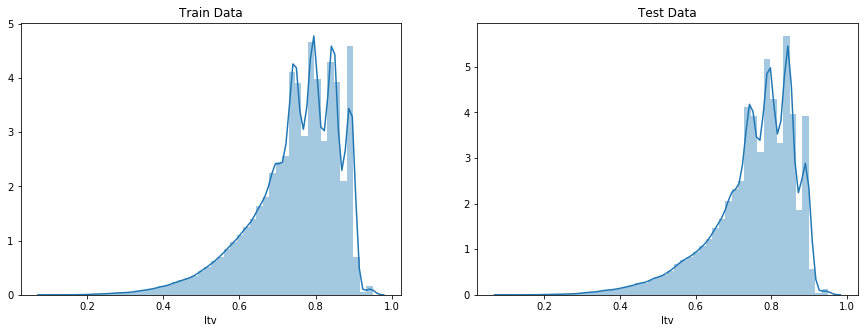

In [109]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.distplot(train['ltv'])
plt.title('Train Data')
plt.subplot(1, 2, 2)
sns.distplot(test['ltv'])
plt.title('Test Data')

#### Flags

Text(0.5, 1.0, 'Passport')

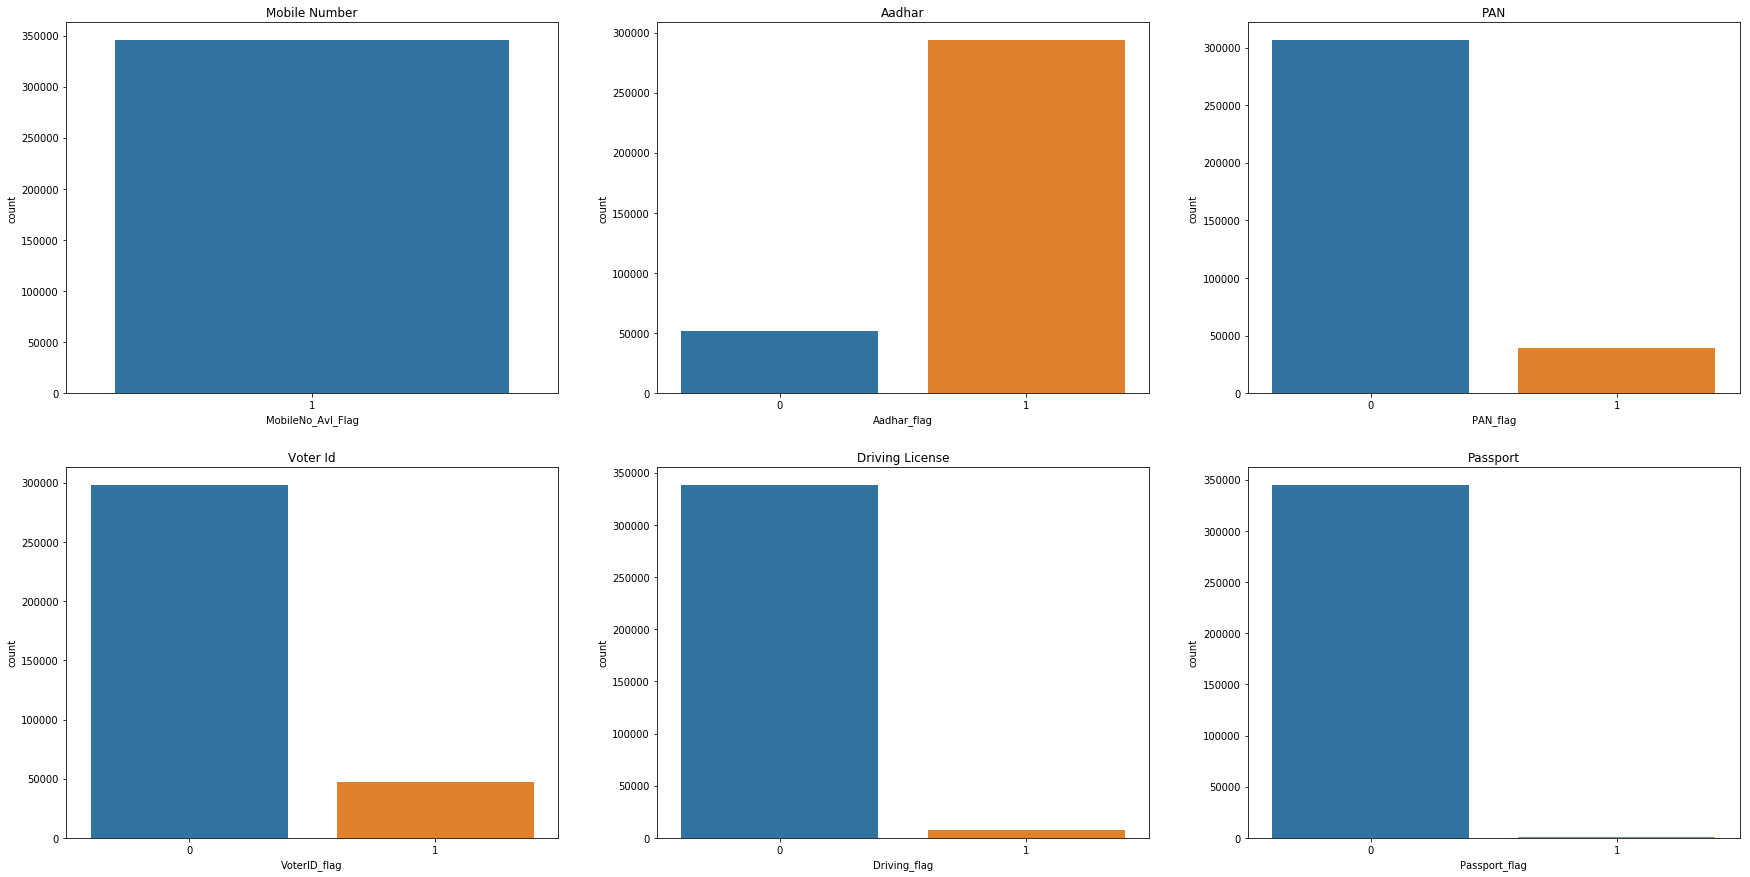

In [37]:
plt.rcParams['figure.figsize'] = (30, 15)
plt.subplot(2, 3, 1)
sns.countplot(train['MobileNo_Avl_Flag'].append(test['MobileNo_Avl_Flag']))
plt.title('Mobile Number')
plt.subplot(2, 3, 2)
sns.countplot(train['Aadhar_flag'].append(test['Aadhar_flag']))
plt.title('Aadhar')
plt.subplot(2, 3, 3)
sns.countplot(train['PAN_flag'].append(test['PAN_flag']))
plt.title('PAN')
plt.subplot(2, 3, 4)
sns.countplot(train['VoterID_flag'].append(test['VoterID_flag']))
plt.title('Voter Id')
plt.subplot(2, 3, 5)
sns.countplot(train['Driving_flag'].append(test['Driving_flag']))
plt.title('Driving License')
plt.subplot(2, 3, 6)
sns.countplot(train['Passport_flag'].append(test['Passport_flag']))
plt.title('Passport')

Hm it looks like pretty much everyone has a mobile number, I.E., it's kind of a useless variable. Just to check..

In [38]:
train['MobileNo_Avl_Flag'].value_counts() + test['MobileNo_Avl_Flag'].value_counts()

1    345546
Name: MobileNo_Avl_Flag, dtype: int64

Yep. Everyone had a mobile. So it's useless and hence we can drop this.

In [39]:
train.drop(['MobileNo_Avl_Flag'], axis = 1, inplace = True)
test.drop(['MobileNo_Avl_Flag'], axis = 1, inplace = True)

The other flags seem fine, but when I get back to this I'll probably have to drop the passport and driving flags.

#### Disbursed Amount & Asset Cost

Text(0.5, 1.0, 'Asset Cost - Test Set')

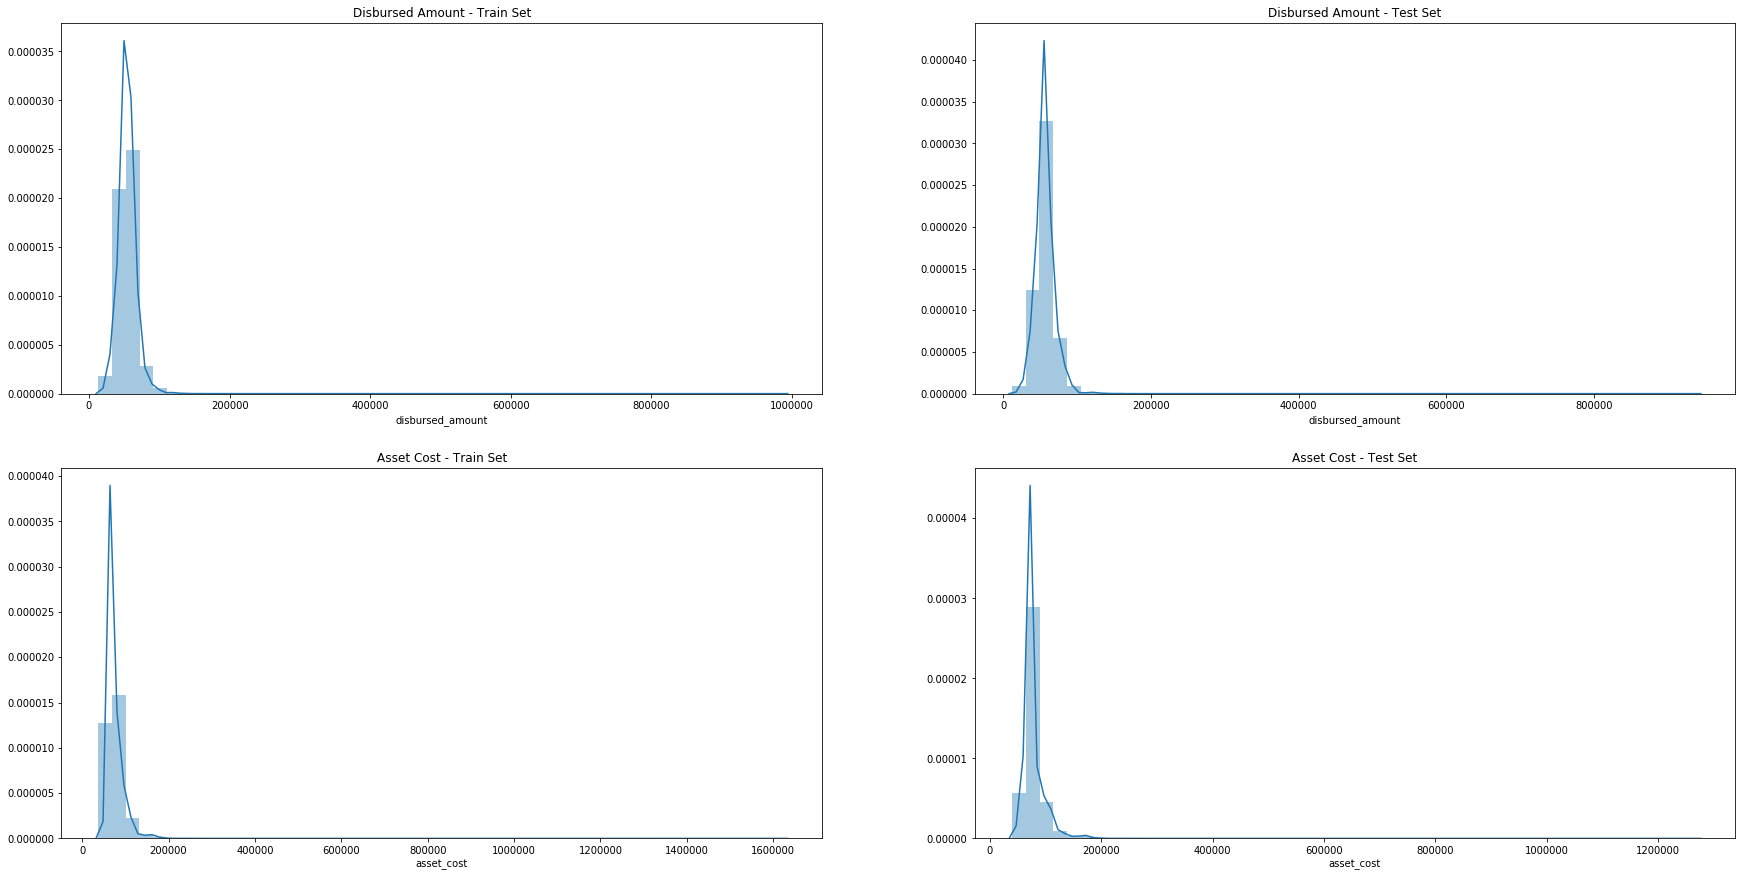

In [49]:
plt.rcParams['figure.figsize'] = (30, 15)
plt.subplot(2, 2, 1)
sns.distplot(train['disbursed_amount'])
plt.title('Disbursed Amount - Train Set')
plt.subplot(2, 2, 2)
sns.distplot(test['disbursed_amount'])
plt.title('Disbursed Amount - Test Set')
plt.subplot(2, 2, 3)
sns.distplot(train['asset_cost'])
plt.title('Asset Cost - Train Set')
plt.subplot(2, 2, 4)
sns.distplot(test['asset_cost'])
plt.title('Asset Cost - Test Set')

The test set favors higher disbursals and higher asset values compared to the train set. Since this is a series of continuous values, we'll need to normalize this. Since there's a pretty big distribution that does have some extremes, we're gonna be using a log transformation.

In [106]:
train['disbursed_amount'] = train['disbursed_amount'].apply(np.log)
test['disbursed_amount'] = test['disbursed_amount'].apply(np.log)
train['asset_cost'] = train['asset_cost'].apply(np.log)
test['asset_cost'] = test['asset_cost'].apply(np.log)

Text(0.5, 1.0, 'Asset Cost - Test Set')

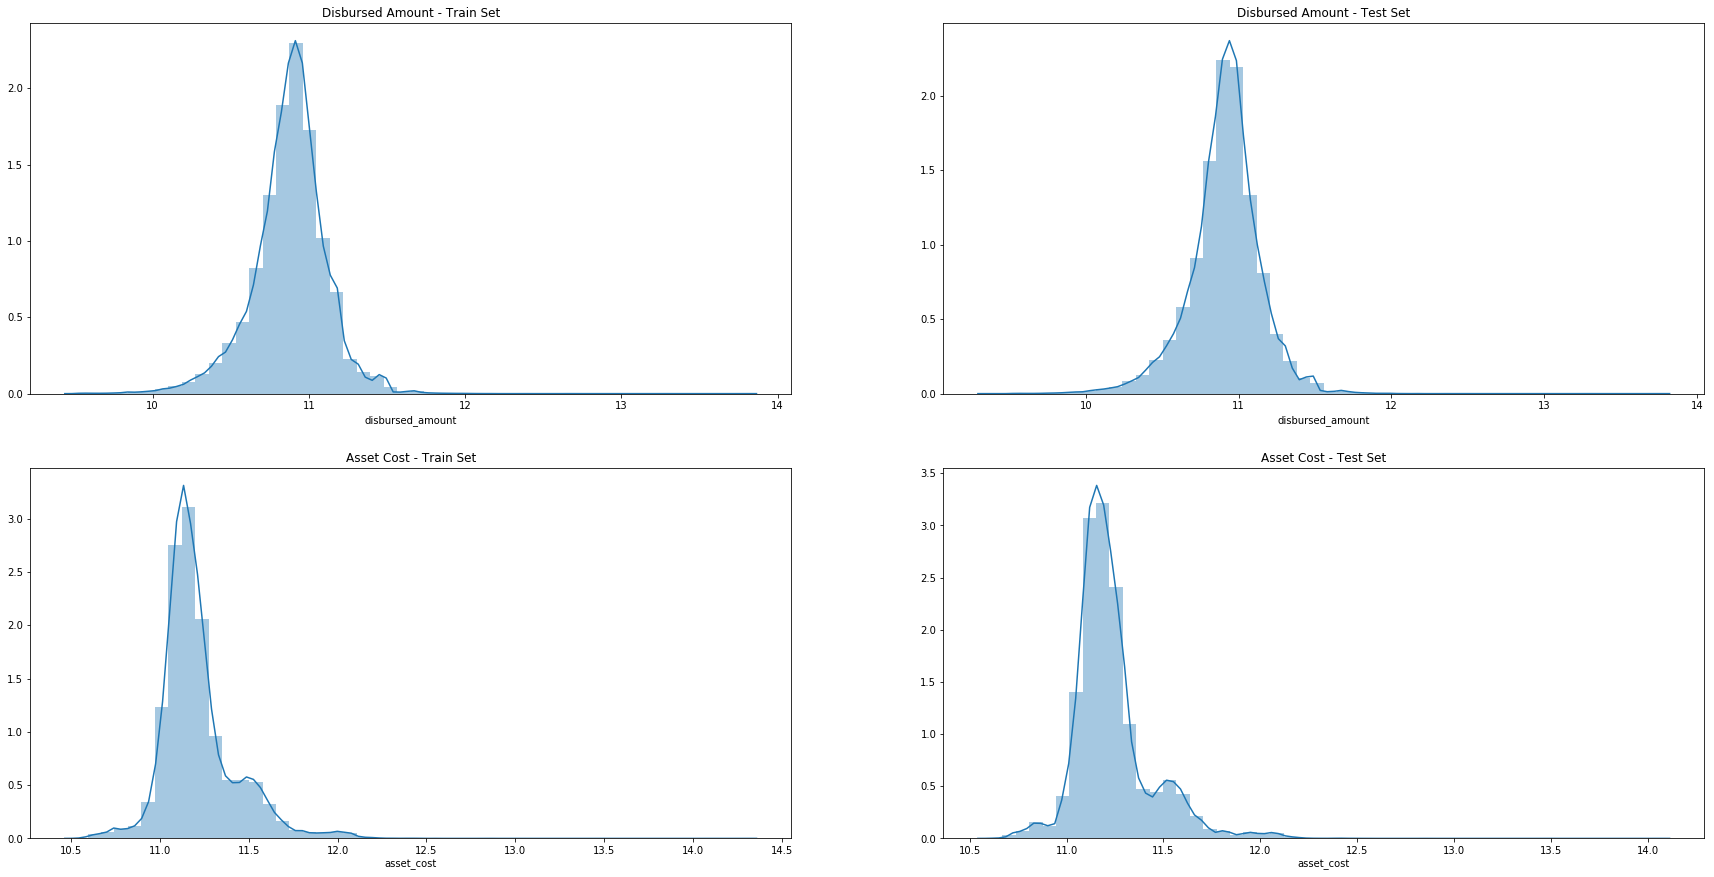

In [107]:
plt.rcParams['figure.figsize'] = (30, 15)
plt.subplot(2, 2, 1)
sns.distplot(train['disbursed_amount'])
plt.title('Disbursed Amount - Train Set')
plt.subplot(2, 2, 2)
sns.distplot(test['disbursed_amount'])
plt.title('Disbursed Amount - Test Set')
plt.subplot(2, 2, 3)
sns.distplot(train['asset_cost'])
plt.title('Asset Cost - Train Set')
plt.subplot(2, 2, 4)
sns.distplot(test['asset_cost'])
plt.title('Asset Cost - Test Set')

### Branch, Supplier, Manufacturer & Pincode ID

Text(0.5, 1.0, 'Current_pincode_ID')

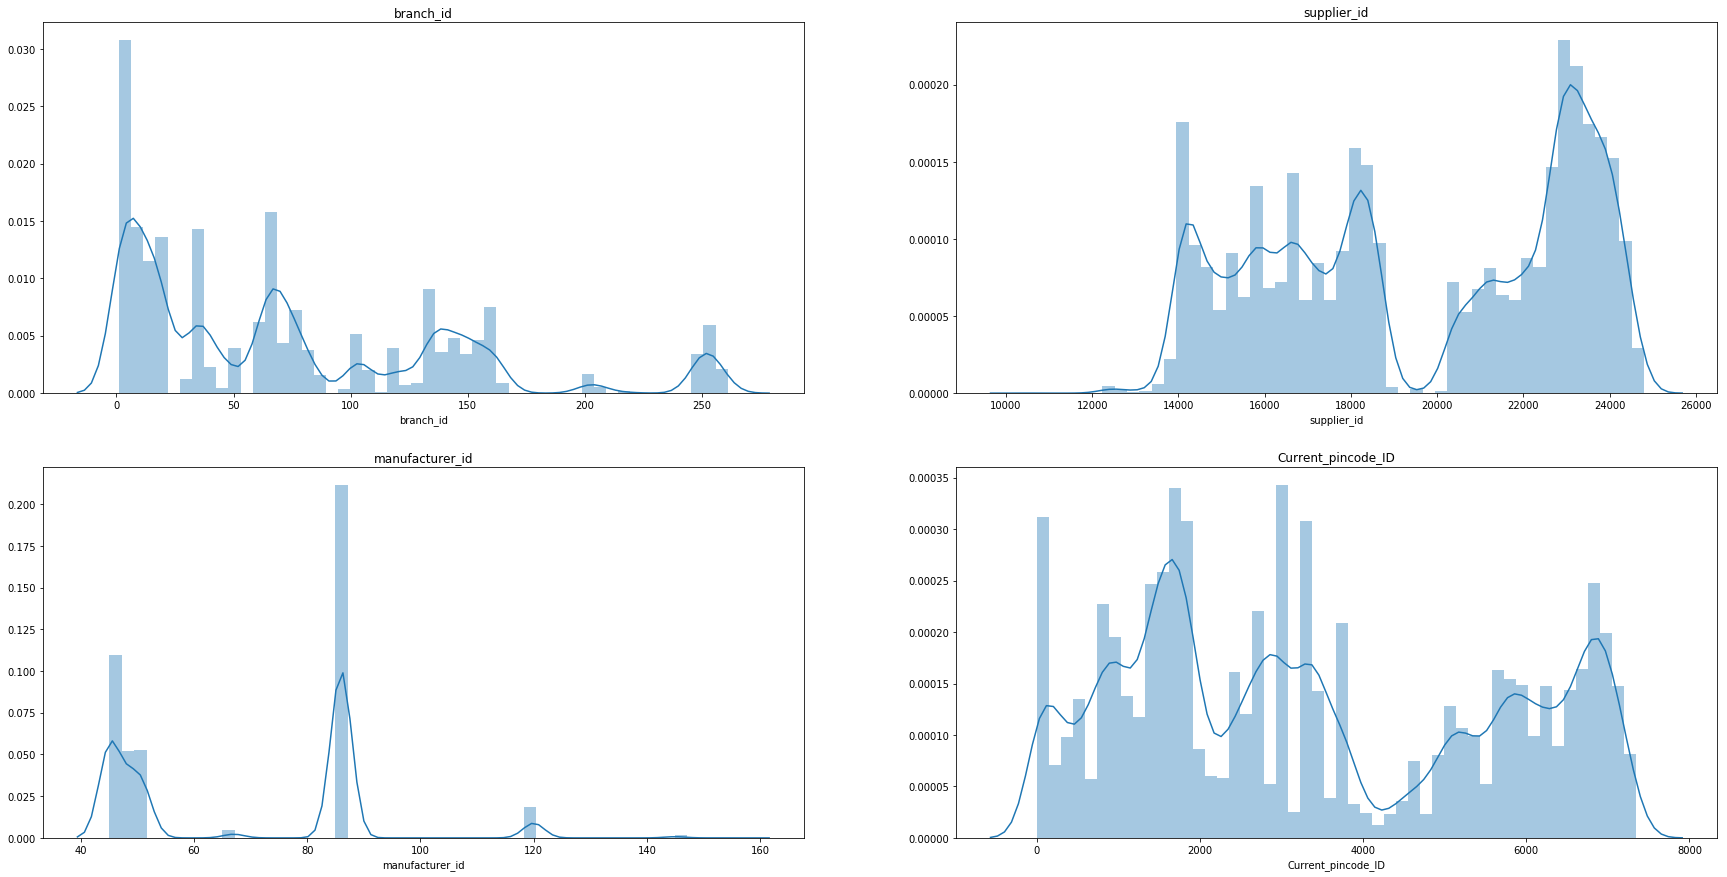

In [53]:
plt.rcParams['figure.figsize'] = (30, 15)
plt.subplot(2, 2, 1)
sns.distplot(train['branch_id'])
plt.title('branch_id')
plt.subplot(2, 2, 2)
sns.distplot(train['supplier_id'])
plt.title('supplier_id')
plt.subplot(2, 2, 3)
sns.distplot(train['manufacturer_id'])
plt.title('manufacturer_id')
plt.subplot(2, 2, 4)
sns.distplot(train['Current_pincode_ID'])
plt.title('Current_pincode_ID')

In [54]:
train['manufacturer_id'].value_counts()

86     109534
45      56626
51      27204
48      16710
49      10220
120      9658
67       2405
145       778
153        12
152         6
156         1
Name: manufacturer_id, dtype: int64

So far we've only examined about 18 of the 41 features. (Excluding the 4 above). Shoulda started earlier lol

#### Unique ID

Nothing much to say, just need to drop it. Making a copy of the columns for the results though.

In [118]:
uniqueID = test['UniqueID']

In [119]:
train.drop(['UniqueID'], axis = 1, inplace = True)
test.drop(['UniqueID'], axis = 1, inplace = True)

#### Loan_Default

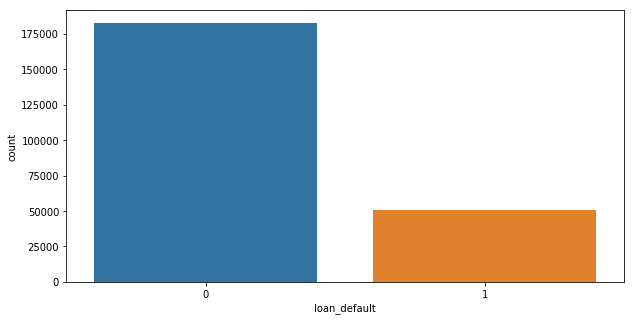

In [120]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(train['loan_default'])

So there seems to be an obvious imbalance here. Simply predicting 0 for everything would give good results but would not work in the real world. So ideally we'd need to do something like SMOTE to handle this. Buuut no time .-.

## Something

So I think enough of the EDA for now, I kinda want to see how it works.

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [122]:
X = train.drop(['loan_default'], axis = 1)
y = train['loan_default']

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

### Random Forest

In [124]:
clf = RandomForestClassifier(n_estimators = 20, verbose = 1)

In [125]:
clf = clf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   19.2s finished


In [127]:
y_pred = clf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.4s finished


In [135]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Accuracy: 0.773948660762154
Precision: 0.3736120182887002
Recall: 0.05633247981091195
F1-Score: 0.09790329482242191


In [139]:
confusion_matrix(y_test, y_pred)

array([[35518,   959],
       [ 9582,   572]], dtype=int64)

In [140]:
prediction = clf.predict(test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.8s finished


In [144]:
output = pd.DataFrame({'UniqueID':uniqueID,'loan_default':prediction})

In [145]:
output.head()

,UniqueID,loan_default
0,655269,0
1,723482,0
2,758529,0
3,763449,0
4,708663,0


In [146]:
output.to_csv('submissions/submission2.csv', index=False)

### AdaBoost

In [147]:
from sklearn.ensemble import AdaBoostClassifier

In [148]:
clf = AdaBoostClassifier()

In [149]:
clf = clf.fit(X_train, y_train)

In [150]:
y_pred = clf.predict(X_test)

In [151]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Accuracy: 0.7826553151337093
Precision: 0.5333333333333333
Recall: 0.014969470159543037
F1-Score: 0.02912156336813871


In [152]:
confusion_matrix(y_test, y_pred)

array([[36344,   133],
       [10002,   152]], dtype=int64)

Gonna stop here as this already seems pretty bad. It's more or less just predicting almost everything as a default.

### Naive-Bayes

Doubt this will actually do well since not all these variables are independent, but just an attempt.

In [155]:
from sklearn.naive_bayes import GaussianNB

In [156]:
clf = GaussianNB()

In [157]:
clf = clf.fit(X_train, y_train)

In [158]:
y_pred = clf.predict(X_test)

In [159]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Accuracy: 0.7714181553044113
Precision: 0.09470304975922954
Recall: 0.005810518022454205
F1-Score: 0.010949243759858958


In [160]:
confusion_matrix(y_test, y_pred)

array([[35913,   564],
       [10095,    59]], dtype=int64)